## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')  # полное отключение всех предупреждений

In [3]:
#считываем датафрейм с нужным разделителем
df = pd.read_csv('unemployed.csv', sep=';')

In [4]:
#смотрим на примерное содержание столбцов
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0.0,4.0,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1.0,4.0,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1.0,4.0,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0.0,4.0,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1.0,2.0,True,False,False,2


In [5]:
#смотрим первичную информацию
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   district           str    
 2   region             str    
 3   month_application  str    
 4   changed_value      bool   
 5   age                str    
 6   gender             float64
 7   education          float64
 8   hc_repeat          bool   
 9   hc_didnotwork      bool   
 10  find_new_job       bool   
 11  count              int64  
dtypes: bool(4), float64(2), int64(2), str(4)
memory usage: 281.9 MB


In [6]:
#узнаем информацию, понимаем, что количество строк достаточно большое
df.shape

(4347416, 12)

In [7]:
#смотрим количество пропусков. количесвто пропусков в гендере несущественно относительно размера датасета, с уровнем же образования придется работать
df.isna().sum()

id                        0
district                  0
region                    0
month_application         0
changed_value             0
age                       0
gender                    8
education            339215
hc_repeat                 0
hc_didnotwork             0
find_new_job              0
count                     0
dtype: int64

In [8]:
#изучаем пропуски в гендере, понимаем, что относительно другой информации в строках его не востановить, но из-за малого количесвтв будет несущественно заполнить случайным значением
df.query('gender.isna()')

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
600269,521970,Приволжский федеральный округ,Оренбургская область,2017-01,False,40-45,NaN,3.0,True,False,False,1
2156738,2182523,Северо-Кавказский федеральный округ,Чеченская Республика,2020-10,True,16-21,NaN,NaN,False,False,True,1
2156739,2183055,Северо-Кавказский федеральный округ,Чеченская Республика,2020-10,True,22-27,NaN,NaN,False,False,False,1
2156788,2184993,Северо-Кавказский федеральный округ,Чеченская Республика,2020-10,True,46-51,NaN,NaN,False,False,False,1
2160397,2177422,Северо-Кавказский федеральный округ,Чеченская Республика,2020-08,True,28-33,NaN,NaN,False,False,False,1
3260801,3240101,Уральский федеральный округ,Ханты-Мансийский автономный округ - Югра,2018-03,False,34-39,NaN,6.0,True,False,True,1
3337760,3402610,Уральский федеральный округ,Челябинская область,2020-10,False,46-51,NaN,4.0,True,False,False,1
4118284,4087928,Южный федеральный округ,Волгоградская область,2019-06,False,52-57,NaN,3.0,True,False,False,1


In [9]:
#заполняем пропуски гендера
df['gender'].fillna(0, inplace=True)

0          0.0
1          1.0
2          1.0
3          0.0
4          1.0
          ... 
4347411    0.0
4347412    0.0
4347413    1.0
4347414    1.0
4347415    0.0
Name: gender, Length: 4347416, dtype: float64

In [10]:
#смотрим пропуски уровня образования
df.query('education.isna()')

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
1579,46072,Дальневосточный федеральный округ,Амурская область,2020-05,False,28-33,1.0,NaN,True,False,True,1
1603,45882,Дальневосточный федеральный округ,Амурская область,2020-05,False,28-33,0.0,NaN,True,False,False,1
1679,47685,Дальневосточный федеральный округ,Амурская область,2020-06,False,22-27,0.0,NaN,True,False,False,1
1790,50446,Дальневосточный федеральный округ,Амурская область,2020-07,False,34-39,0.0,NaN,True,False,False,2
1794,51295,Дальневосточный федеральный округ,Амурская область,2020-07,False,58-60,1.0,NaN,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12,False,28-33,0.0,NaN,False,False,False,3
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12,False,16-21,0.0,NaN,False,False,False,2
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12,False,40-45,1.0,NaN,False,False,False,5
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12,False,28-33,1.0,NaN,False,False,False,4


In [11]:
#смотрим уникальные значения образования и замечаем, что есть все обозначения, которые были в описании датасета, но отсутсвует "0", который заменяется nan, что означает "нет данных"
df['education'].unique()

array([ 4.,  2.,  1.,  3.,  6.,  9., nan])

In [12]:
#заполняем пропуски
df['education'].fillna(0, inplace=True)

0          4.0
1          4.0
2          4.0
3          4.0
4          2.0
          ... 
4347411    0.0
4347412    0.0
4347413    0.0
4347414    0.0
4347415    0.0
Name: education, Length: 4347416, dtype: float64

In [13]:
#проверяем наличие пропусков после заполнения
df.isna().sum()

id                        0
district                  0
region                    0
month_application         0
changed_value             0
age                       0
gender                    8
education            339215
hc_repeat                 0
hc_didnotwork             0
find_new_job              0
count                     0
dtype: int64

In [14]:
#смотрим наличие дубликатов
df.duplicated().sum()

np.int64(0)

In [15]:
#преобразуем к правильному временнному формату. Также приводим гендер и образование к строке, чтобы впоследствии убрать проблемы с категоризацией данных, еще сначала приводим к вещественным, а затем к строке, а то ругается 
df['month_application'] = pd.to_datetime(df['month_application'], format='%Y-%m')
df['gender'] = df['gender'].astype(float)
df['education'] = df['education'].astype(float)

In [16]:
#смотрим информацию после преобразования типов
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   district           str           
 2   region             str           
 3   month_application  datetime64[us]
 4   changed_value      bool          
 5   age                str           
 6   gender             float64       
 7   education          float64       
 8   hc_repeat          bool          
 9   hc_didnotwork      bool          
 10  find_new_job       bool          
 11  count              int64         
dtypes: bool(4), datetime64[us](1), float64(2), int64(2), str(3)
memory usage: 281.9 MB


In [17]:
#добавляем столбцы год и название месяца, причем год делаем строкой, чтобы впоследствии избавиться от проблем с помстроением графиков и параметром "hue", то же делаем со столюцом повторных обращений
df['year'] = pd.DatetimeIndex(df['month_application']).year.astype(str)
df['month'] = pd.DatetimeIndex(df['month_application']).month_name()
df['hc_repeat_str'] = df['hc_repeat'].astype(str)
df

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month,hc_repeat_str
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0.0,4.0,True,False,False,1,2017,January,True
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1.0,4.0,True,False,False,1,2017,January,True
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1.0,4.0,True,False,True,1,2017,January,True
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0.0,4.0,False,False,False,1,2017,January,False
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1.0,2.0,True,False,False,2,2017,January,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12-01,False,28-33,0.0,NaN,False,False,False,3,2020,December,False
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12-01,False,16-21,0.0,NaN,False,False,False,2,2020,December,False
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12-01,False,40-45,1.0,NaN,False,False,False,5,2020,December,False
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12-01,False,28-33,1.0,NaN,False,False,False,4,2020,December,False


In [18]:
#снова смотрим преобразования
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   district           str           
 2   region             str           
 3   month_application  datetime64[us]
 4   changed_value      bool          
 5   age                str           
 6   gender             float64       
 7   education          float64       
 8   hc_repeat          bool          
 9   hc_didnotwork      bool          
 10  find_new_job       bool          
 11  count              int64         
 12  year               str           
 13  month              str           
 14  hc_repeat_str      str           
dtypes: bool(4), datetime64[us](1), float64(2), int64(2), str(6)
memory usage: 381.4 MB


ВЫВОДЫ

1. Датасет состоит из 4 347 416 строк и 12 столбцов, в которые занесены различные типы данных: строковые, целочисленные, вещественные, булевые.
2. Датасет содержал пропуски в двух столбцах, которые были устранены без влияния на информативность.
3. Датасет не содержал дубликатов.
4. В датасете были изменены и добавлены новые столбцы, а также приведены типы данных для последующей удобной работы.
5. Были добавлены столбцы года и названия месяца.

АНАЛИЗ ДАННЫХ

*В начале работы я построил линейный график по всему датасету, указав нужные столбцы, но для 4 000 000+ записей считалось слишком долго
значения получились же странными, не 6 разрядов как ожидалось, а гораздо меньше, тогда я заподозрил, что используется другая агрегирующая функция
в документации в параметре `estimator` по умолчанию стоит средняя, если ее менять вручную каждый раз для нужной таблицы, то графики можно строить сразу по датасету без сводной таблицы*

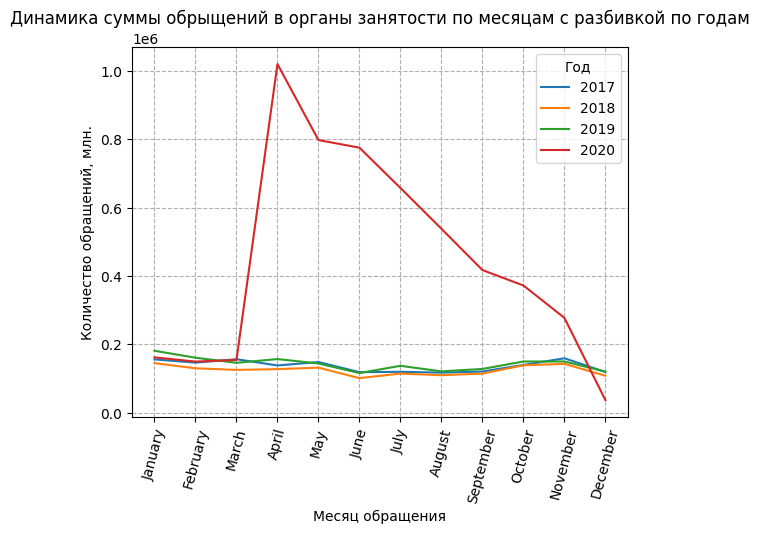

In [ ]:
#далее будут аналогичные построения графиков с использованием своих агрегирующих функций, столбцов, разбивками, условиями
#аналогичное построение с разбивкой через hue
sns.lineplot(df, x='month', y='count', estimator='sum', hue='year', errorbar=None)
plt.title('Динамика суммы обрыщений в органы занятости по месяцам с разбивкой по годам')
plt.xlabel('Месяц обращения')
plt.ylabel('Количество обращений, млн.')
plt.legend(title='Год', labels=['2017','2018', '2019', '2020'])
plt.xticks(rotation=75)
plt.grid(linestyle='--')
plt.show()

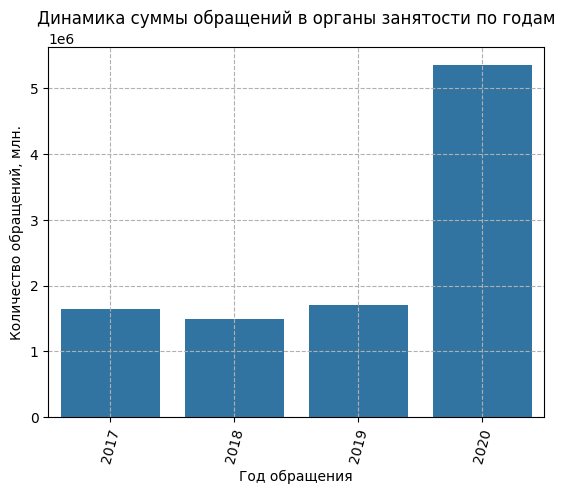

In [57]:
#аналогичное построение
sns.barplot(df, x='year', y='count', estimator='sum', errorbar=None)
plt.title('Динамика суммы обращений в органы занятости по годам')
plt.xlabel('Год обращения')
plt.ylabel('Количество обращений, млн.')
plt.xticks(rotation=75)
plt.grid(linestyle='--')
plt.show()

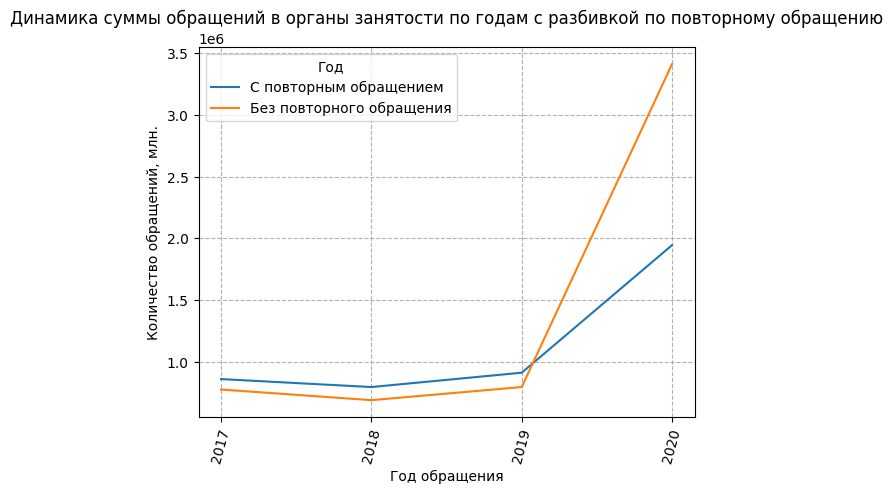

In [23]:
#аналогичное построение, убрал доверительные интервалы, с ними вылезали ошибки в подписях легенды
sns.lineplot(df, x='year', y='count', estimator='sum', hue='hc_repeat_str', errorbar=None)
plt.title('Динамика суммы обращений в органы занятости по годам с разбивкой по повторному обращению')
plt.xlabel('Год обращения')
plt.ylabel('Количество обращений, млн.')
plt.legend(title='Год', labels=['С повторным обращением','Без повторного обращения'])
plt.xticks(rotation=75)
plt.grid(linestyle='--')
plt.show()

ВЫВОДЫ № 1

1. Наблюдалось повышение количества обратившихся за трудоустройством с марта по апрель и спада с апрель по август по всем годам в сумме
2. Наблюдалось резкое отклонение числа соискателей в 2020 году по сравнению с 2017, 2018 и 2019 годами, возможно, вследствие эпидемии
3. Наблюдалось превышение повторного обращения над бесповторным до 2019 года, после чего ситуация поменялась, возможно, вследтвие эпидемии

In [24]:
#решил проверить, насколько много может быть дел в совокупности, то есть не правильное трактование count приводит к сильной ошибки
df['count'].unique().max()

np.int64(8014)

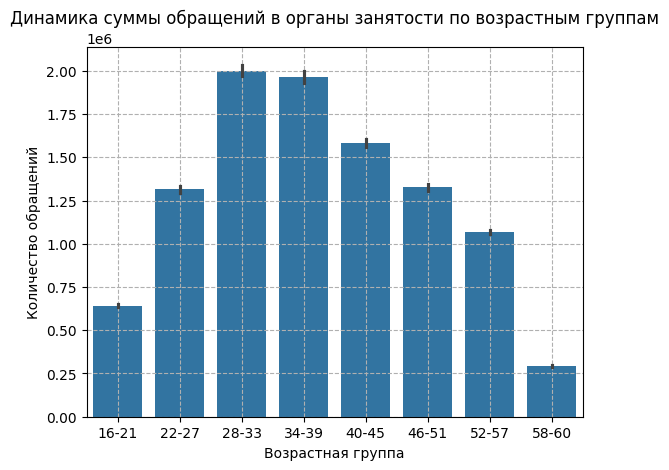

In [59]:
#аналогичное построение
sns.barplot(df.sort_values('age'), x='age', y='count', estimator='sum')
plt.title('Динамика суммы обращений в органы занятости по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество обращений')
plt.grid(linestyle='--')
plt.show()

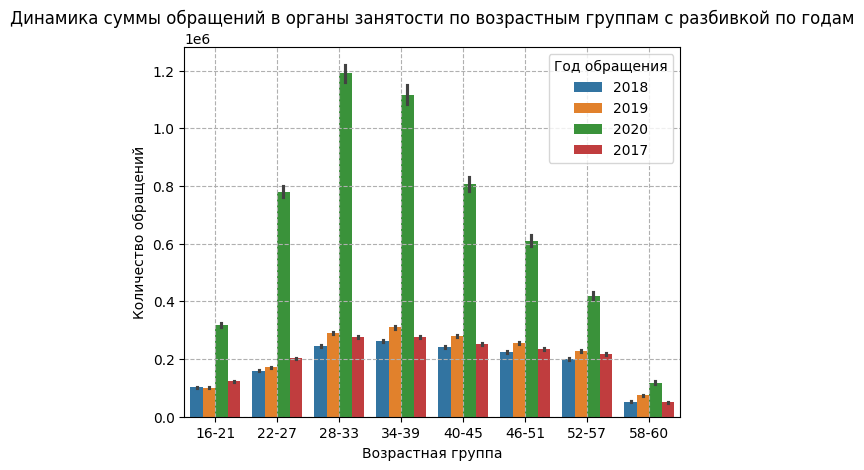

In [60]:
#аналогичное построение
sns.barplot(df.sort_values('age'), x='age', y='count', estimator='sum', hue='year')
plt.title('Динамика суммы обращений в органы занятости по возрастным группам с разбивкой по годам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество обращений')
plt.legend(title='Год обращения')
plt.grid(linestyle='--')
plt.show()

ВЫВОД № 2

1. Как видно из первой столбчатой диаграммы, наиболее часто обращались возрастные группы 28–33 и 34–39 лет, после чего наблюдается монотонный спад.
2. Интересно отметить, что группа 22–27 лет по количеству обращений сравнима с группой 46–51 лет, хотя в молодом возрасте ожидался пик активности.
3. Как и предполагалось, самая младшая и старшая возрастные группы обращались реже всего, что может быть связано с меньшей потребностью в трудоустройстве.
4. Второй график позволяет уточнить полученные выводы. Наблюдаются всплески активности во всех группах в 2020 году, причём распределение остаётся схожим с общим трендом без разбивки по годам.
5. Количество обращений в 2020 году в каждой группе превышает минимальные показатели других лет в два и более раза.
6. Период эпидемии коронавируса можно выделить как ключевую закономерность, объясняющую резкий рост обращений практически во всех возрастных группах.

In [56]:
#просто вывожу требуемы параметры
print(f"Число обратившихся за все годы, нашедших работу: {df.query('find_new_job == True')['count'].sum()}\nПроцент обратившихся за все годы, нашедших работу: {df.query('find_new_job == True')['count'].sum()/df['count'].sum():.2%}")

Число обратившихся за все годы, нашедших работу: 3576669
Процент обратившихся за все годы, нашедших работу: 35.10%


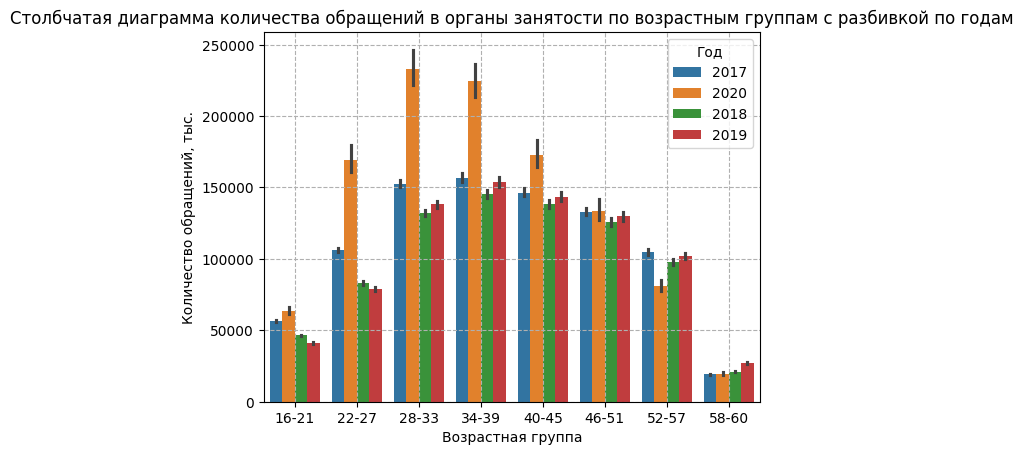

In [61]:
#аналогичное построение
sns.barplot(df.query('find_new_job == True').sort_values('age'), x='age', y='count', estimator='sum', hue='year')
plt.title('Столбчатая диаграмма количества обращений в органы занятости по возрастным группам с разбивкой по годам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество обращений, тыс.')
plt.legend(title='Год')
plt.grid(linestyle='--')
plt.show()

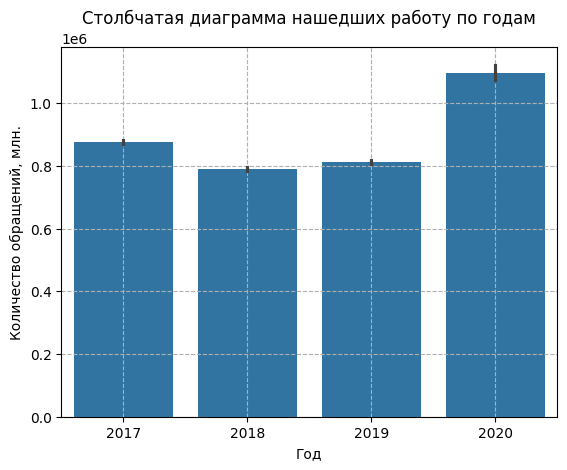

In [53]:
#аналогичное построение
sns.barplot(df.query('find_new_job == True'), x='year', y='count', estimator='sum')
plt.title('Столбчатая диаграмма нашедших работу по годам')
plt.xlabel('Год')
plt.ylabel('Количество обращений, млн.')
plt.grid(linestyle='--')
plt.show()

ВЫВОД № 3 (более точная разбивка на проценты по группам будет в следующей части)

1. Можно заметить, что распределение трудоустроенных по возрастным группам совпадает с распределением всех обратившихся.
2. Высокие показатели 2020 года также сохраняются, что отражается в большем количестве успешно трудоустроенных в этот период.
3. Процент трудоустроенных по всему датасету нельзя назвать "впечатляющим", однако более трети обратившихся за все годы нашли работу.

In [ ]:
#какие-либо проценты по сгруппированным данным, где нужно найти процент по группе, а не по всему датасету вызывает затруднения и, возможно,
#не имеет "нормального" решения, поэтому используется следующий костыль. values нужно для того, чтобы пандас адекватно складывал фреймы как столбец чисел
df_ex_4 = pd.pivot_table(df, index='year',columns='find_new_job', aggfunc={'count':'sum'}).reset_index()
df_ex_4['%'] = df_ex_4.loc[:,[('count',True)]].values/(df_ex_4.loc[:,[('count',False)]].values + df_ex_4.loc[:,[('count',True)]].values) * 100
df_ex_4['%_all_data'] = df_ex_4.loc[:,[('count',True)]].values/df['count'].sum() * 100
df_ex_4

year    count                   % %_all_data
find_new_job          False     True                      
0             2017   761183   875769  53.499980   8.594216
1             2018   696596   789671  53.131167   7.749307
2             2019   894743   813881  47.633710   7.986888
3             2020  4261023  1097348  20.479134  10.768645

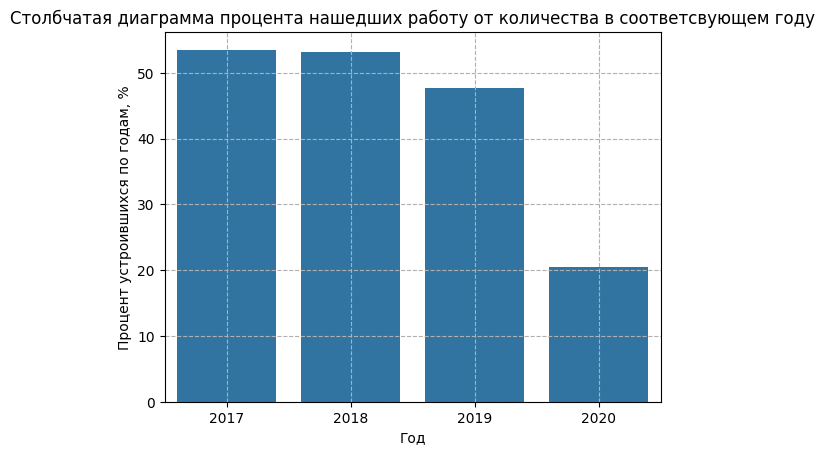

In [52]:
#аналогичное построение
sns.barplot(df_ex_4, x='year', y='%')
plt.title('Столбчатая диаграмма процента нашедших работу от количества в соответсвующем году')
plt.xlabel('Год')
plt.ylabel('Процент устроившихся по годам, %')
plt.grid(linestyle='--')
plt.show()

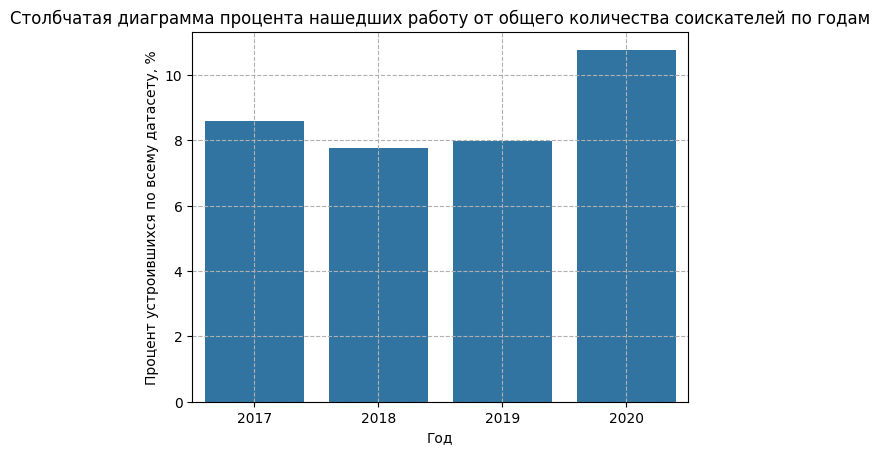

In [51]:
#аналогичное построение
sns.barplot(df_ex_4, x='year', y='%_all_data')
plt.title('Столбчатая диаграмма процента нашедших работу от общего количества соискателей по годам')
plt.xlabel('Год')
plt.ylabel('Процент устроившихся по всему датасету, %')
plt.grid(linestyle='--')
plt.show()

ВЫВОДЫ №4

1. Процент трудоустроившихся соискателей в 2020 году от общего числа обратившихся в этот же год является самым низким по сравнению с аналогичными показателями других лет.
2. Доля трудоустроившихся в 2020 году от общего количества обратившихся за весь период исследования является самой высокой среди всех лет.
3. Основываясь на двух предыдущих пунктах, можно предположить следующую закономерность: несмотря на то, что в 2020 году доля трудоустроившихся среди обратившихся в этот же год была ниже, чем в другие годы, абсолютное число трудоустроившихся в 2020 году оказалось наибольшим в общем распределении за весь период. Это объясняется экстремально высоким общим количеством обращений в 2020 году.

In [33]:
#создаем словари для категоризации гендера и уровня образования по начальным данным датасета
gender_list = {1:'Мужчина',
               0 :'Женщина'
}
education_list = {1:'начальное общее образование',
                  2:'основное общее образование',
                  3:'среднее общее образование',
                  4:'среднее профессиональное образование',
                  6:'высшее образование',
                  9:'другое',
                  0:'нет данных'
}
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   district           str           
 2   region             str           
 3   month_application  datetime64[us]
 4   changed_value      bool          
 5   age                str           
 6   gender             float64       
 7   education          float64       
 8   hc_repeat          bool          
 9   hc_didnotwork      bool          
 10  find_new_job       bool          
 11  count              int64         
 12  year               str           
 13  month              str           
 14  hc_repeat_str      str           
dtypes: bool(4), datetime64[us](1), float64(2), int64(2), str(6)
memory usage: 381.4 MB


In [34]:
#производим категоризацию, "намепливаем"
df['gender_name'] = df['gender'].map(gender_list)
df['education_name'] = df['education'].map(education_list)
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month,hc_repeat_str,gender_name,education_name
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0.0,4.0,True,False,False,1,2017,January,True,Женщина,среднее профессиональное образование
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1.0,4.0,True,False,False,1,2017,January,True,Мужчина,среднее профессиональное образование
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1.0,4.0,True,False,True,1,2017,January,True,Мужчина,среднее профессиональное образование
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0.0,4.0,False,False,False,1,2017,January,False,Женщина,среднее профессиональное образование
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1.0,2.0,True,False,False,2,2017,January,True,Мужчина,основное общее образование


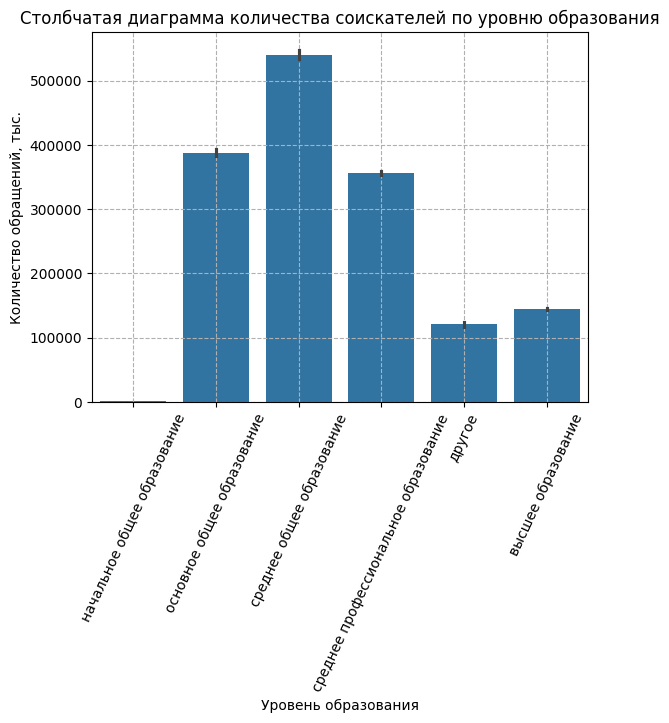

In [50]:
#аналогичное пострение
sns.barplot(df.query('hc_didnotwork == True'), x='education_name', y='count', estimator='sum')
plt.title('Столбчатая диаграмма количества соискателей по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество обращений, тыс.')
plt.xticks(rotation=65)
plt.grid(linestyle='--')
plt.show()

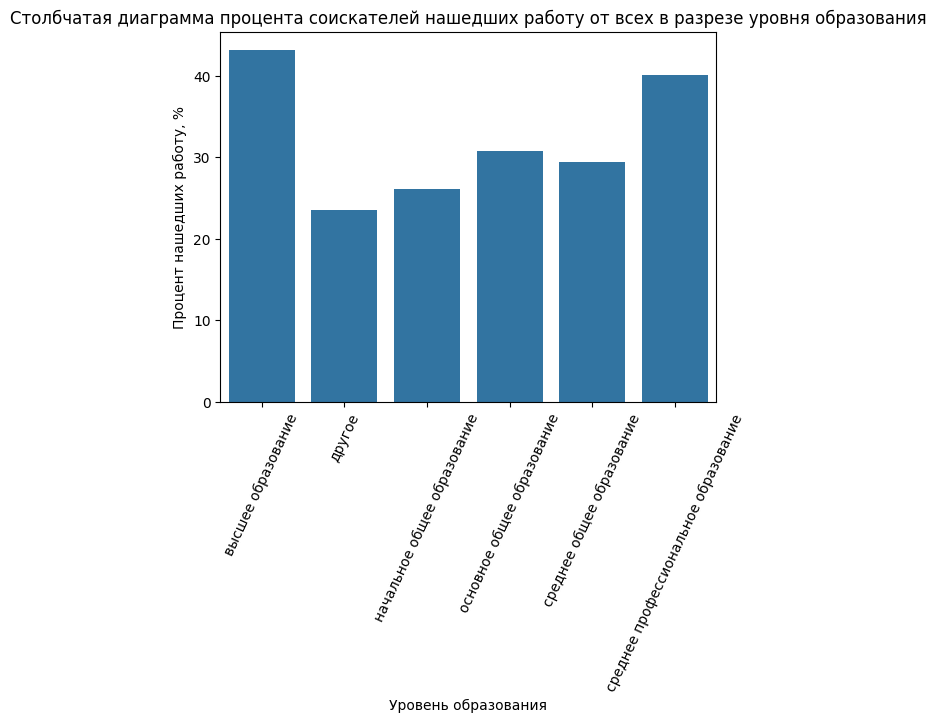

In [36]:
#испоьзовался тот же костыль с процентами
df_ex_5 = df.pivot_table(index='education_name',columns='find_new_job', aggfunc={'count':'sum'}).reset_index()
df_ex_5['%'] = df_ex_5.loc[:,[('count', True)]].values / (df_ex_5.loc[:,[('count', True)]].values + df_ex_5.loc[:,[('count', False)]].values) * 100
df_ex_5
sns.barplot(df_ex_5, x='education_name', y='%')
plt.title('Столбчатая диаграмма процента соискателей нашедших работу от всех в разрезе уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Процент нашедших работу, %')
plt.xticks(rotation=65)
plt.show()

ВЫВОД №5

1. По первой диаграмме видно, что соискатели с начальным общим образованием находятся в абсолютном меньшинстве, так как это лишь первая ступень карьерного роста.
2. Высшее образование не занимает лидирующих позиций по количеству обращений: вероятно, студенты в меньшей степени нуждаются в подобной поддержке, поскольку относительно легко трудоустраиваются самостоятельно.
3. Основное общее образование лидирует по количеству обращений: школьникам, решившим начать работать, сложнее всего найти работу самостоятельно.
4. Соискатели с высшим и средним профессиональным образованием, обратившиеся за содействием в трудоустройстве, имели более высокие шансы быть принятыми на работу.
5. Минимальный процент трудоустроившихся составляет около 20 %, что ниже среднего значения по всему датасету.
6. Тем не менее, анализируя графики, можно отметить, что быстрее и успешнее трудоустраиваются студенты высших и профессиональных учебных заведений.

### Проанализируем данный за 2020 год кроме декабря, так как в этот месяц данные не полные

In [37]:
#сразу создаем нужный срез данных
df_ex_6 = df.query('year == "2020" and month != "December"')
df_ex_6 

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month,hc_repeat_str,gender_name,education_name
1382,40299,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,28-33,0.0,4.0,True,False,True,2,2020,January,True,Женщина,среднее профессиональное образование
1383,41202,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,52-57,1.0,6.0,True,False,False,1,2020,January,True,Мужчина,высшее образование
1384,41210,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,1.0,2.0,True,False,False,2,2020,January,True,Мужчина,основное общее образование
1385,41240,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,1.0,4.0,True,False,False,2,2020,January,True,Мужчина,среднее профессиональное образование
1386,41223,Дальневосточный федеральный округ,Амурская область,2020-01-01,False,58-60,1.0,3.0,True,False,False,1,2020,January,True,Мужчина,среднее общее образование
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347396,4345135,Южный федеральный округ,Ростовская область,2020-11-01,False,16-21,1.0,NaN,False,False,False,1,2020,November,False,Мужчина,NaN
4347397,4346476,Южный федеральный округ,Ростовская область,2020-11-01,False,46-51,1.0,NaN,False,False,False,8,2020,November,False,Мужчина,NaN
4347398,4346002,Южный федеральный округ,Ростовская область,2020-11-01,False,34-39,1.0,NaN,False,False,False,7,2020,November,False,Мужчина,NaN
4347399,4345559,Южный федеральный округ,Ростовская область,2020-11-01,False,28-33,0.0,NaN,False,False,False,5,2020,November,False,Женщина,NaN


In [38]:
df_ex_6.info()

<class 'pandas.DataFrame'>
Index: 1576388 entries, 1382 to 4347400
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1576388 non-null  int64         
 1   district           1576388 non-null  str           
 2   region             1576388 non-null  str           
 3   month_application  1576388 non-null  datetime64[us]
 4   changed_value      1576388 non-null  bool          
 5   age                1576388 non-null  str           
 6   gender             1576383 non-null  float64       
 7   education          1475725 non-null  float64       
 8   hc_repeat          1576388 non-null  bool          
 9   hc_didnotwork      1576388 non-null  bool          
 10  find_new_job       1576388 non-null  bool          
 11  count              1576388 non-null  int64         
 12  year               1576388 non-null  str           
 13  month              1576388 non-null  str

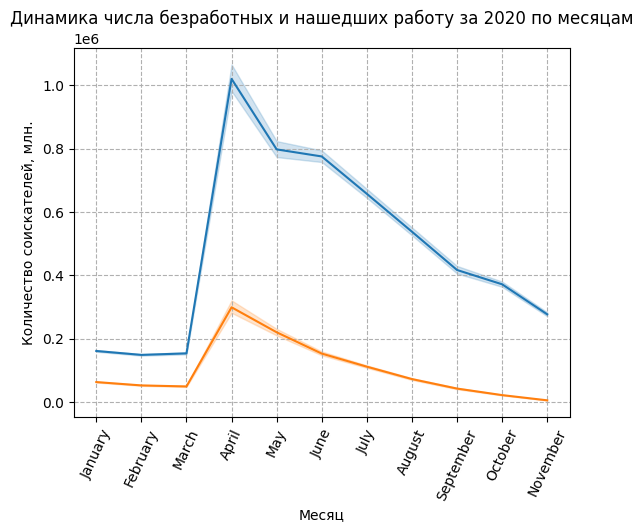

In [48]:
#аналогичное построение
sns.lineplot(df_ex_6, x='month', y='count', estimator='sum')
sns.lineplot(df_ex_6.query('find_new_job == True'), x='month', y='count', estimator='sum')
plt.title('Динамика числа безработных и нашедших работу за 2020 по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество соискателей, млн.')
plt.xticks(rotation=65)
plt.grid(linestyle='--')
plt.show()

In [40]:
#находим нужные проценты
df_6_gen = df_ex_6.pivot_table(index='gender', columns='find_new_job', aggfunc={'count':'sum'}).reset_index()
df_6_gen['%'] = df_6_gen.loc[:,[('count', True)]].values/(df_6_gen.loc[:,[('count', False)]].values + df_6_gen.loc[:,[('count', True)]].values) * 100
df_6_gen

gender    count                  %
find_new_job           False    True           
0               0.0  2447981  604532  19.804404
1               1.0  1776535  492607  21.708954

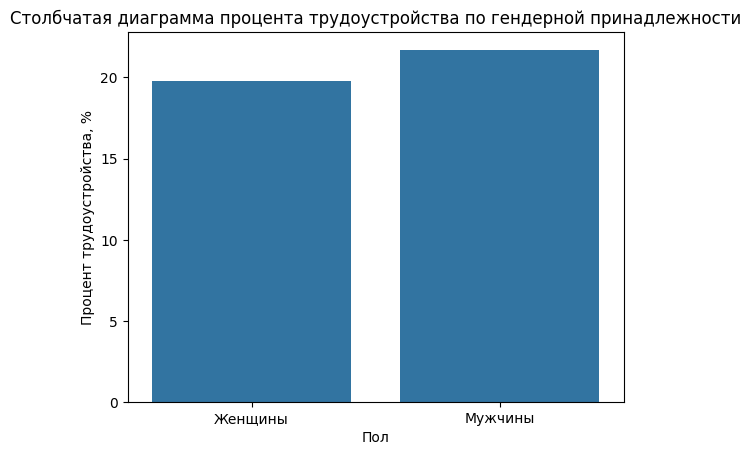

In [41]:
#аналогичные построения
sns.barplot(df_6_gen, x='gender', y='%').set_xticklabels(['Женщины','Мужчины'])
plt.title('Столбчатая диаграмма процента трудоустройства по гендерной принадлежности')
plt.xlabel('Пол')
plt.ylabel('Процент трудоустройства, %')
plt.show()

In [42]:
#не требует комментариев
df_ex_6.pivot_table(index='district', aggfunc={'count':'sum'})

,count
district,
Дальневосточный федеральный округ,289224
Приволжский федеральный округ,1048536
Северо-Западный федеральный округ,477798
Северо-Кавказский федеральный округ,701329
Сибирский федеральный округ,718075
Уральский федеральный округ,461223
Центральный федеральный округ,1029581
Южный федеральный округ,595894


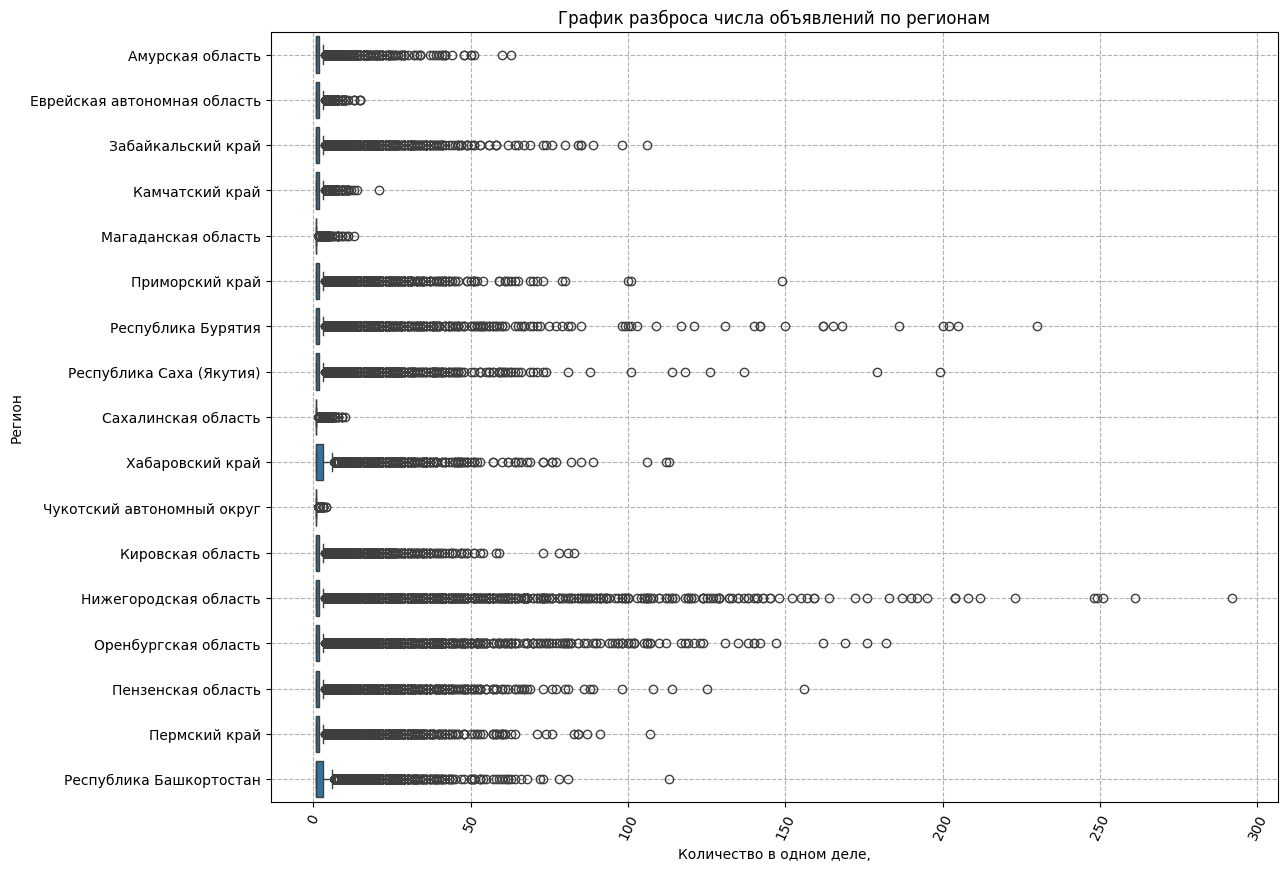

In [49]:
#аналогичное построение, увеличил в ширину
plt.figure(figsize=(13,10))
sns.boxplot(df_ex_6[:300000], x='count', y='region', orient='h')
plt.title('График разброса числа объявлений по регионам')
plt.ylabel('Регион')
plt.xlabel('Количество в одном деле,')
plt.xticks(rotation=65)
plt.grid(linestyle='--')
plt.show()

In [44]:
df_ex_6.query('district == "Северо-Западный федеральный округ"').pivot_table(index='region', aggfunc={'count':'sum'})

,count
region,
Архангельская область,42056
Вологодская область,50283
Калининградская область,52451
Ленинградская область,49637
Мурманская область,23166
Ненецкий автономный округ,1877
Новгородская область,20088
Псковская область,17499
Республика Карелия,27755


In [45]:
#костыль с процентами
df_6_dis = df_ex_6.pivot_table(index='district', columns='find_new_job', aggfunc={'count':'sum'}).reset_index()
df_6_dis['%'] = df_6_dis.loc[:,[('count', True)]].values/(df_6_dis.loc[:,[('count', False)]].values + df_6_dis.loc[:,[('count', True)]].values) * 100
df_6_dis

district   count                  %
find_new_job                                        False    True           
0               Дальневосточный федеральный округ  235005   54219  18.746370
1                   Приволжский федеральный округ  796807  251729  24.007664
2               Северо-Западный федеральный округ  372518  105280  22.034416
3             Северо-Кавказский федеральный округ  660970   40359   5.754646
4                     Сибирский федеральный округ  535995  182080  25.356683
5                     Уральский федеральный округ  368423   92800  20.120419
6                   Центральный федеральный округ  767625  261956  25.442971
7                         Южный федеральный округ  487177  108717  18.244352

In [46]:
# более приемлемая реализация
df_dis_margins = (pd.crosstab(df_ex_6['district'], df_ex_6['find_new_job'], values=df_ex_6['count'], aggfunc='sum', normalize='index')*100).reset_index()
df_dis_margins

find_new_job,district,False,True
0,Дальневосточный федеральный округ,81.253630,18.746370
1,Приволжский федеральный округ,75.992336,24.007664
2,Северо-Западный федеральный округ,77.965584,22.034416
3,Северо-Кавказский федеральный округ,94.245354,5.754646
4,Сибирский федеральный округ,74.643317,25.356683
5,Уральский федеральный округ,79.879581,20.120419
6,Центральный федеральный округ,74.557029,25.442971
7,Южный федеральный округ,81.755648,18.244352


ВЫВОДЫ №6

1. Количество обратившихся за содействием в трудоустройстве за все месяцы значительно превышает количество успешно трудоустроенных.
2. Наблюдается выраженный пик в апреле для всех лет, после которого следует монотонный спад до конца года.
3. Процент трудоустройства по гендерному признаку примерно одинаков, что является положительным показателем для страны, хотя в целом он колеблется около 20 %.
4. Если корректно интерпретировать столбец count, то он отражает количество полностью идентичных случаев (дел). Медиана по регионам составляет менее 10, однако встречаются дела с количеством более сотни, что представляет собой выбросы в датасете, но важные для анализа.
5. На графиках ниже представлен процент трудоустройства по регионам. Средний показатель составляет около 20 %, при этом Северо-Кавказский и Южный федеральные округа отстают от этого среднего значения.

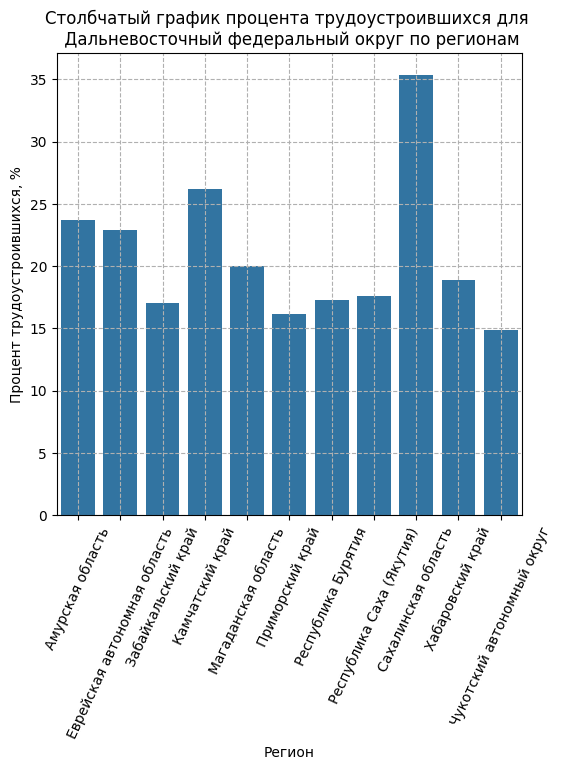

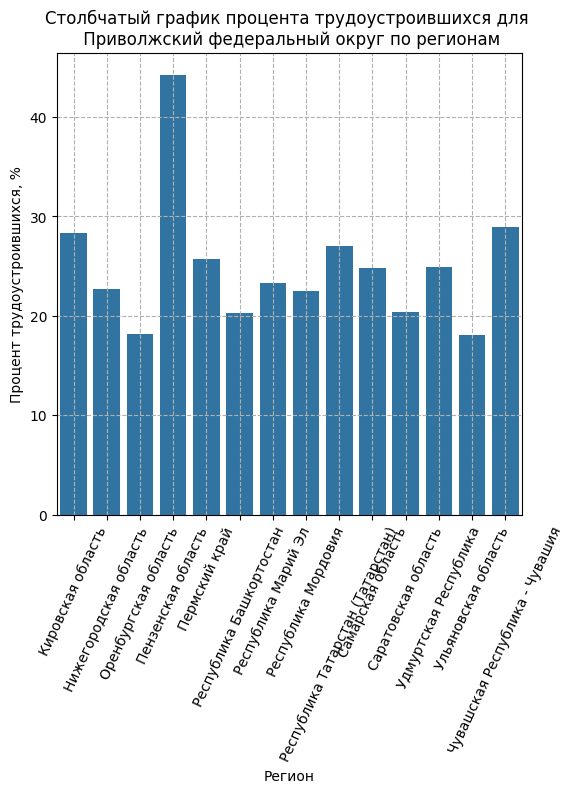

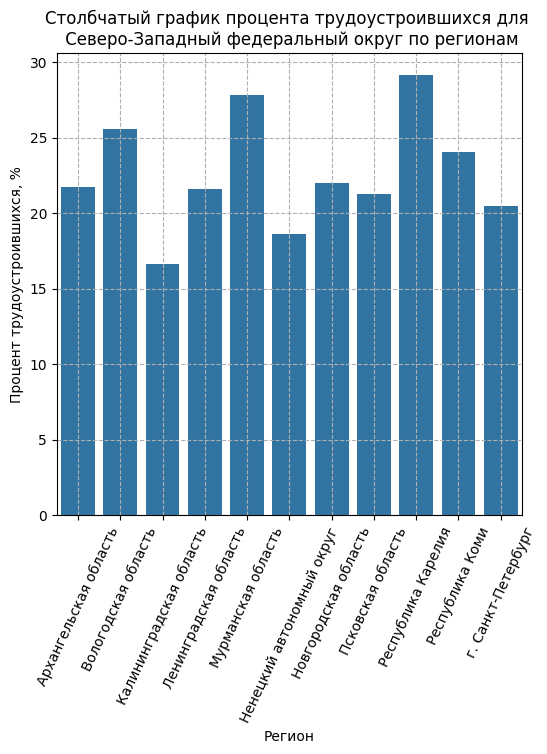

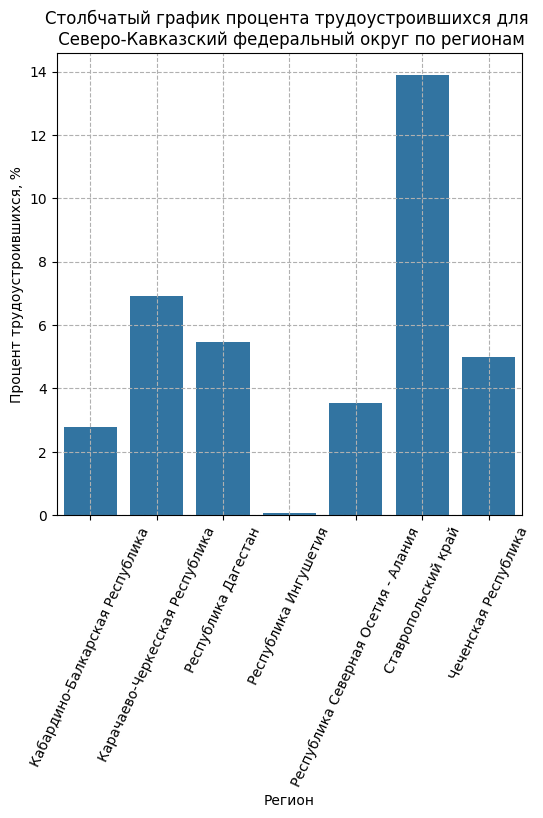

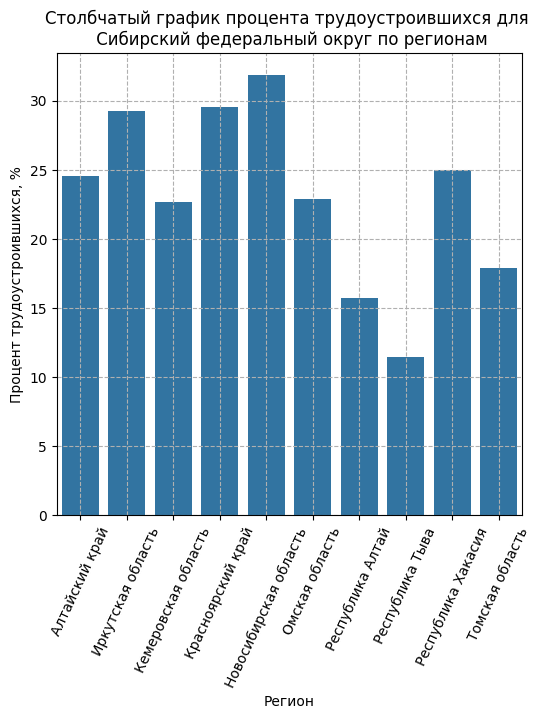

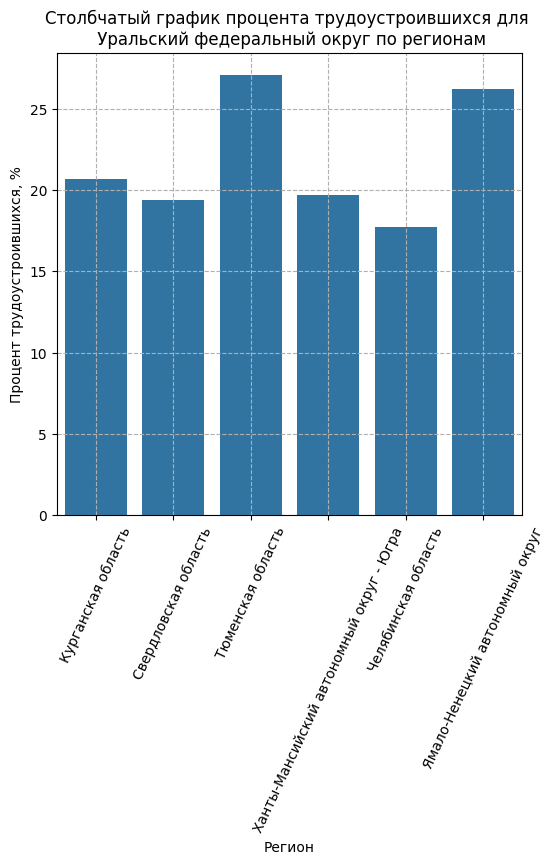

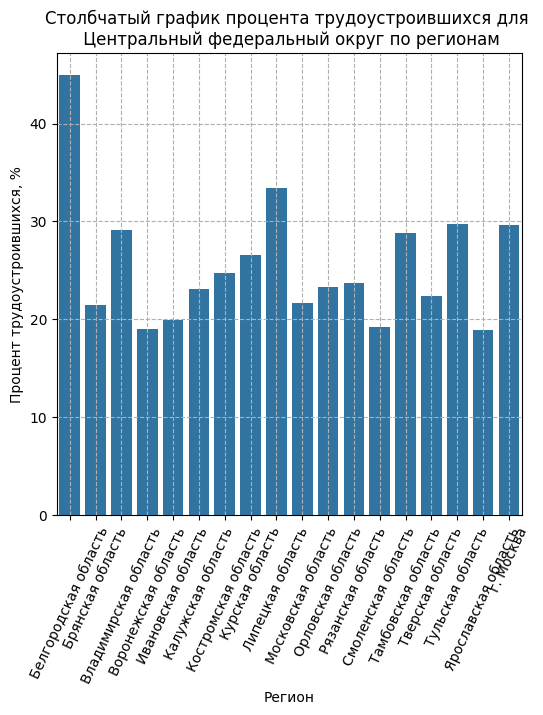

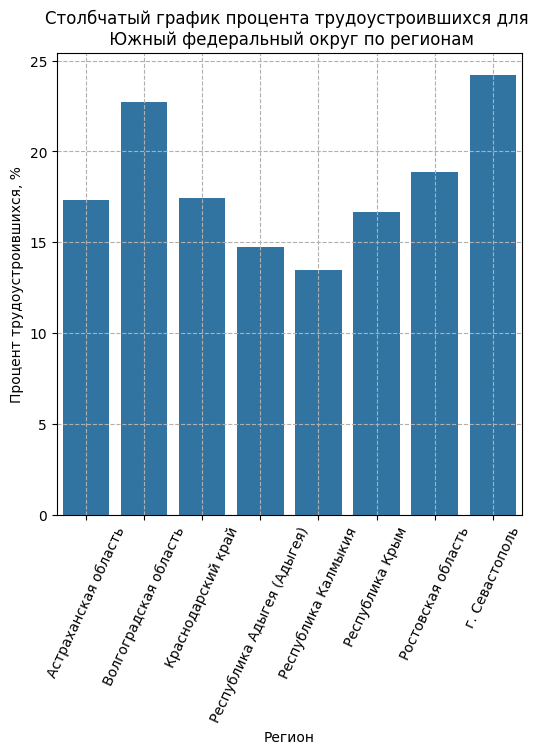

In [47]:
#цикл использующий аналогичную конструкцию с процентами по группам
for reg in df['district'].unique():
    plt.figure(figsize=(6,6))
    df_6_pos = df_ex_6.query('district == @reg').pivot_table(index='region', columns='find_new_job', aggfunc={'count':'sum'}).reset_index()
    df_6_pos['%'] = df_6_pos.loc[:,[('count', True)]].values/(df_6_pos.loc[:,[('count', False)]].values + df_6_pos.loc[:,[('count', True)]].values) * 100
    sns.barplot(df_6_pos, x='region', y='%')
    plt.title(f'Столбчатый график процента трудоустроившихся для \n {reg} по регионам')
    plt.xlabel('Регион')
    plt.ylabel('Процент трудоустроившихся, %')
    plt.xticks(rotation=65)
    plt.grid(linestyle='--')
    plt.show()

## Общий вывод

1. Был получен датасет для обработки и последующего анализа. В рамках обработки были заполнены пропущенные значения, проверены дубликаты, изменены типы данных и добавлены новые столбцы.
2. Уже на первых графиках заметно выделение 2020 года по сравнению с остальными. Можно предположить, что такое изменение на рынке труда было вызвано эпидемией коронавируса. Также наблюдается пик обращений в апреле, что коррелирует с пиковыми периодами распространения инфекции.
3. Распределение заявок по годам является нормальным: крайние возрастные группы менее активны, преобладают категории от 28 до 51 года. Во всех возрастных группах заметно доминирование показателей 2020 года.
4. Примерно половина обратившихся в конкретном году трудоустраивалась в том же году, за исключением 2020 года. В 2020 году как количество обратившихся, так и количество трудоустроившихся в абсолютном выражении превышали показатели предыдущих лет.
5. По уровню образования закономерно легче находили работу обладатели высшего и профессионального образования. Чаще всего работу искали лица со средним уровнем образования.
6. Анализируя отдельно 2020 год (за исключением декабря), можно отметить, что пик числа соискателей пришёлся на апрель, при этом процент трудоустройства был невысоким — около 20 %. По всему датасету наблюдались выбросы по количеству аналогичных дел, максимальное из которых составило 8072.
7. На основе проведённого анализа можно сделать ряд выводов. Общей закономерностью является аномалия данных 2020 года, которая, вероятнее всего, была вызвана эпидемией коронавируса.